# Player cards recognition

In [1]:
import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.exposure
import numpy as np

from skimage.filters import sobel
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from hearthstone.processing import Factory
import hearthstone.sides as hsd

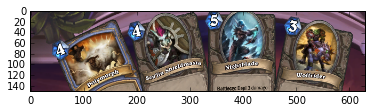

In [115]:
#img = skimage.io.imread('../data/screenshots/Hearthstone Screenshot 04-02-17 11.48.07.png') # 8
img = skimage.io.imread('../data/screenshots/Hearthstone Screenshot 04-02-17 11.42.36.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)
#img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-02-17 11.48.07.png')

player_cards = Factory.cut_off_image(img, hsd.PLAYER_CARDS.loc, hsd.PLAYER_CARDS.shape)
plt.imshow(player_cards)
plt.imsave(fname='pcards.png', arr=player_cards)

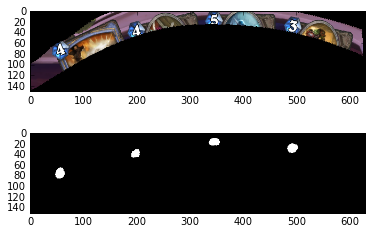

In [116]:
mask = skimage.io.imread('../data/player_mask.png')
mask = skimage.color.rgb2gray(mask)

img_pom = player_cards.copy()
img_pom[mask > 0] = 0

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(img_pom)

pom = img_pom[:,:,2]
neg = np.zeros_like(pom)
neg[pom > 240] = 1
a = neg

pom = img_pom[:,:,0]
neg = np.zeros_like(pom)
neg[pom > 205] = 1
# neg = skimage.morphology.dilation(neg, skimage.morphology.disk(8))
b = neg

neg = (a+b)/2

pom = img_pom[:,:,1]
neg = np.zeros_like(pom)
neg[pom > 240] = 1
# neg = skimage.morphology.dilation(neg, skimage.morphology.disk(8))
c = neg

neg = a
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(4))
neg = skimage.morphology.erosion(neg, skimage.morphology.diamond(5))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(3))
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(5))
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(5))

labeled = skimage.measure.label(neg, background=0)

axes[1].imshow(neg, cmap=plt.cm.gray)
# axes[1].imshow(labeled)

## Old (BACKUP)

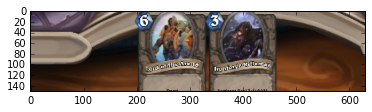

In [5]:
#img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-03-17 19.43.47.png') # 8
img = skimage.io.imread('../data/images/img005.png')

img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asanyarray(img, dtype=np.uint8)


player_cards = Factory.cut_off_image(img, (590, 930), (630, 150))
plt.imshow(player_cards)

#img_gray = skimage.color.rgb2gray(player_cards)

#for y,row in enumerate(img_gray):
#    for x, item in enumerate(row):
#        if y > 0.0007*(x-255)**2 - 0.15*x + 68:
#            player_cards[y,x,:] = 0
#        if y < 0.0007*(x-235)**2 - 0.15*x + 25:
#            player_cards[y,x,:] = 0

plt.imshow(player_cards)

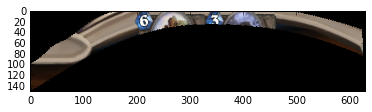

In [8]:
mask = skimage.io.imread('../data/player_mask.png')
mask = skimage.color.rgb2gray(mask)

player_cards[mask > 0] = 0
pom = player_cards[:,:,1]

# pom = skimage.exposure.equalize_adapthist(pom)
# pom = np.asarray(pom*255.0, np.uint8)
# seg = pom
# seg = np.zeros_like(pom)
# seg[pom > 160] = 1

pom = player_cards[:,:,2]

neg = np.zeros_like(pom)
neg[pom > 225] = 1
a = neg

pom = player_cards[:,:,0]
neg = np.zeros_like(pom)
neg[pom > 205] = 1
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(8))
b = neg

neg = (a+b)/2
# neg = skimage.morphology.erosion(neg, skimage.morphology.disk(2))
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(4))
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(3))

#pom = skimage.exposure.equalize_adapthist(pom)

# pomb = player_cards[:,:,0]
# seg2 = np.zeros_like(pomb)
# seg2[pomb > 120] = 1

# pomc = player_cards[:,:,0]
# seg3 = np.zeros_like(pomc)
# seg3[np.invert(pomc) > 240] = 1

# seg[seg2 > 0] = 0
# seg[seg3 > 0] = 0

# seg = skimage.morphology.erosion(seg, skimage.morphology.star(1))
# seg = skimage.morphology.dilation(seg, skimage.morphology.star(17))

plt.imshow(player_cards, cmap=plt.cm.gray)

## New attempt to recognize player cards in more robust way

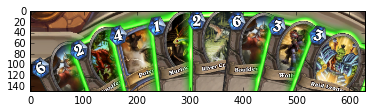

In [3]:
img = skimage.io.imread('../data/images/img002.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, dtype=np.uint8)

cards = Factory.cut_off_image(img, hsd.PLAYER_CARDS.loc, hsd.PLAYER_CARDS.shape)
plt.imshow(cards)

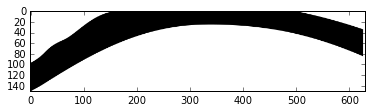

In [4]:
mask = skimage.io.imread('../data/player_mask.png')
mask = skimage.color.rgb2gray(mask)

plt.imshow(mask, cmap=plt.cm.gray)

9

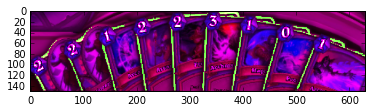

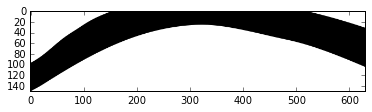

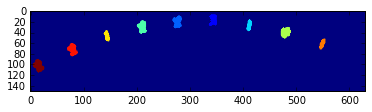

In [63]:
img = skimage.io.imread('../data/testing_images/Hearthstone Screenshot 04-14-17 23.13.46.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, dtype=np.uint8)

cards = Factory.cut_off_image(img, hsd.PLAYER_CARDS.loc, hsd.PLAYER_CARDS.shape)
plt.figure()
plt.imshow(cards)

mask = skimage.io.imread('../data/player_mask.png')
mask = skimage.color.rgb2gray(mask)

plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)

cards_gray = skimage.color.rgb2gray(cards)
segmented = np.zeros_like(cards_gray)
segmented[cards_gray == 1.0] = 1
segmented[mask > 0.0] = 0

gr = cards[:,:,1]
gr[gr < 255] = 0

segmented = skimage.morphology.closing(segmented, skimage.morphology.disk(5))
segmented = skimage.morphology.dilation(segmented, skimage.morphology.disk(3))

segmented = np.asarray(segmented*255.0, dtype=np.bool)
skimage.morphology.remove_small_objects(segmented, min_size=75, in_place=True)
# plt.figure()
# plt.imshow(binary, cmap=plt.cm.gray)
segmented = np.asarray(segmented, dtype=np.uint8)

# segmented = skimage.morphology.erosion(segmented, skimage.morphology.disk(2))
# segmented = skimage.morphology.erosion(segmented, skimage.morphology.disk(2))

labeled = skimage.measure.label(segmented, background=0)

plt.figure()
plt.imshow(labeled)
len(np.unique(labeled))-1